#### **Decision Tree (Karar Verme Ağaçları)**

In [1]:
# SEK BİLGİLER

# Çoklu (Multiple) sınıflandırma yapacağında Decision tree genellikle Multiple Class Logistic Regrdan daha verimlidir

# Logistic Regr Tekil sınıflandırmada iyi

# Çoklu Sınıflandırmada:
# Random Forest > Decision Tree > Logistic R

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("penguins.csv")
df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


#### **Eksik Veriler**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
df.dropna(inplace= True)

In [7]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [10]:
df["sex"].unique()
# Burada . diye bir cinsiyet var

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [12]:
df = df[df["sex"] != "."]
# Bu olmayanları al dedik ve o veri dışındakileri aldık

In [13]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [14]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: xlabel='species', ylabel='count'>

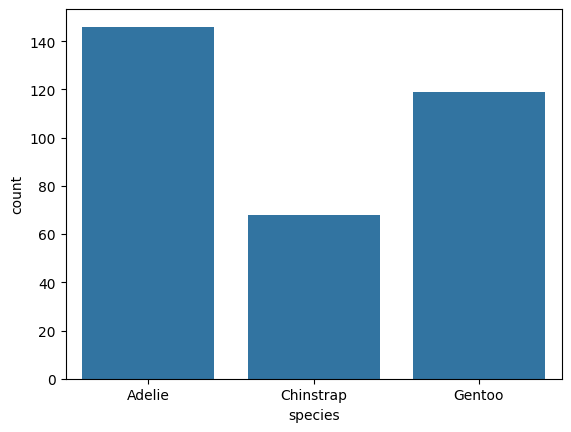

In [22]:
sns.countplot(x = "species", data=df)

In [23]:
df["species"].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

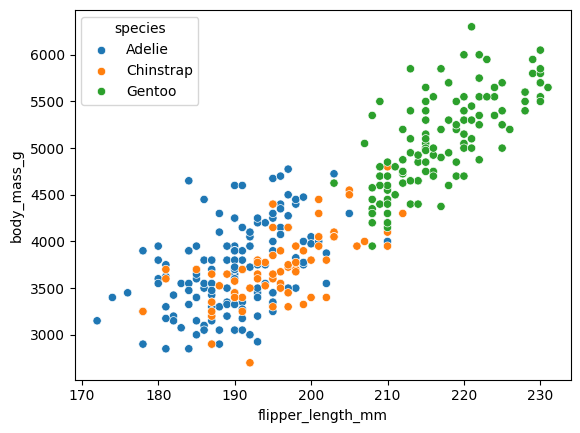

In [25]:
sns.scatterplot(x = "flipper_length_mm", y="body_mass_g", data=df, hue="species")

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

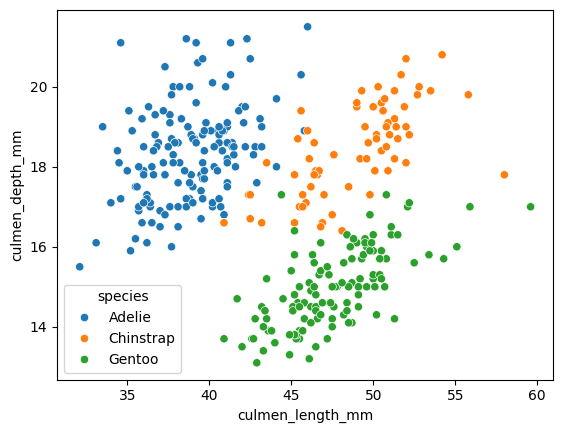

In [26]:
sns.scatterplot(x= "culmen_length_mm", y="culmen_depth_mm", data=df, hue="species")

<Axes: xlabel='species', ylabel='culmen_length_mm'>

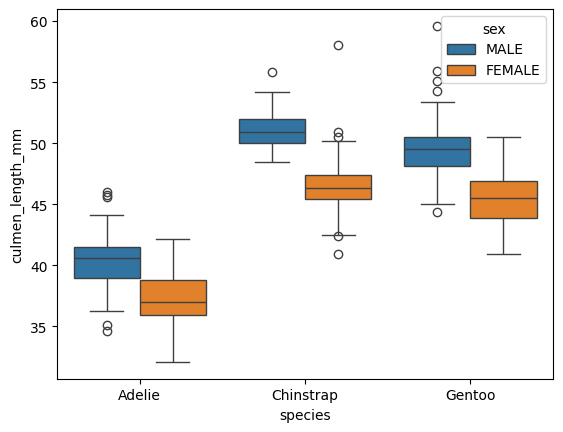

In [28]:
sns.boxplot(x="species", y="culmen_length_mm", data=df, hue="sex")

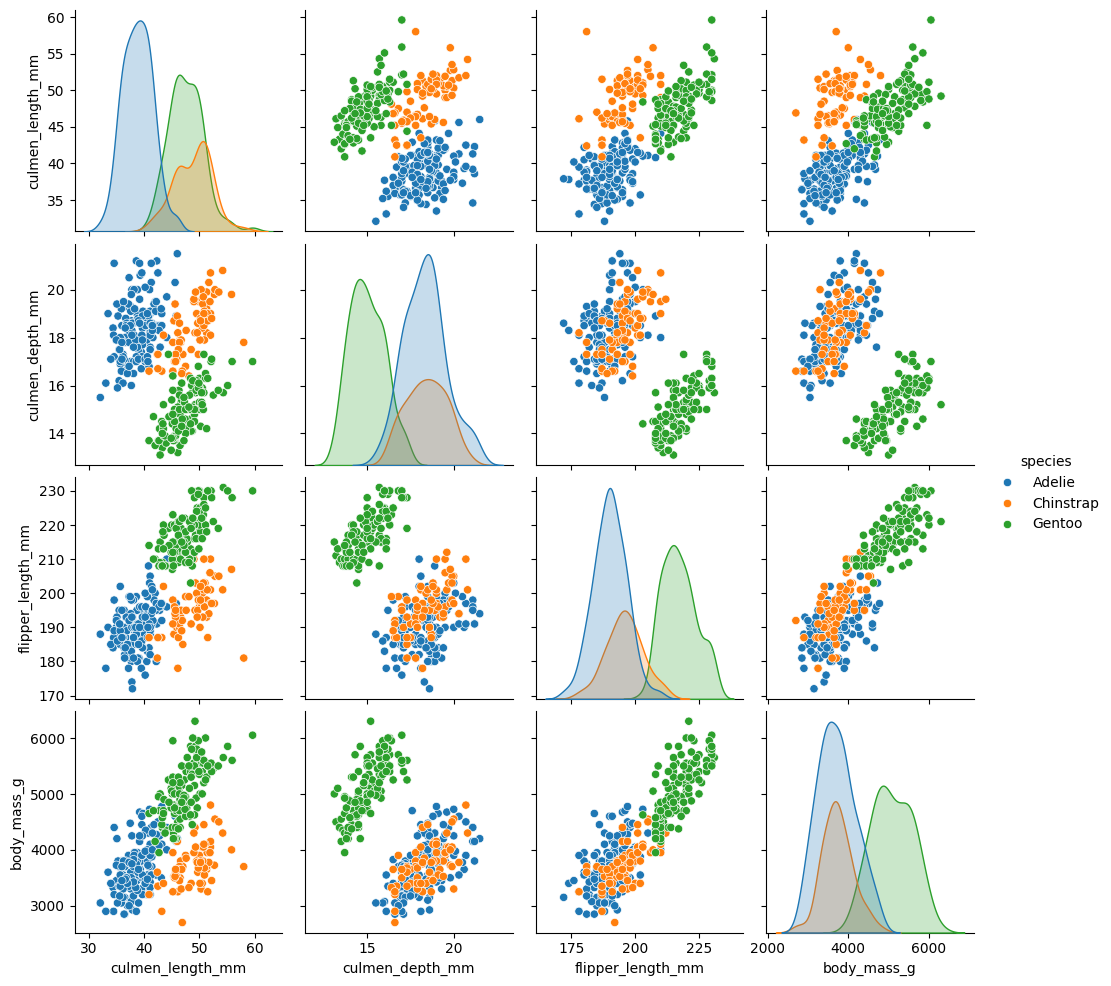

In [29]:
sns.pairplot(data=df, hue="species")

#### **Train Test Split**

In [ ]:
# Aşşağıdaki metotlar verilerimizi nümerik hale getiriyoruz

pd.get_dummies(df.drop("species", axis=1),drop_first= True)
# Dummy yani sayısal şekle çevirirken içinden species verimizi atarak çevirdik

# drop_first True yazarak bunu silerek gözlemleyebilirsin istersen normalde 0 0 1 yazıyordu mesela şu adada değil bunda değil bunnda 1 tarzı

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


* get dummies,
* label encoder,
* one hot encoder
# Bu 3 ü get dummies ile aynı mantıkta çalışıyor

In [34]:
X = pd.get_dummies(df.drop("species", axis=1), drop_first= True)
y = df["species"]

In [35]:
from sklearn.model_selection import  train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

#### **Karar Verme Ağacı Modeli**

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
pengu_pred = model.predict(X_test)

#### **Değerlendirme**

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [44]:
confusion_matrix(y_test, pengu_pred)

array([[43,  2,  1],
       [ 0, 23,  0],
       [ 0,  0, 31]], dtype=int64)

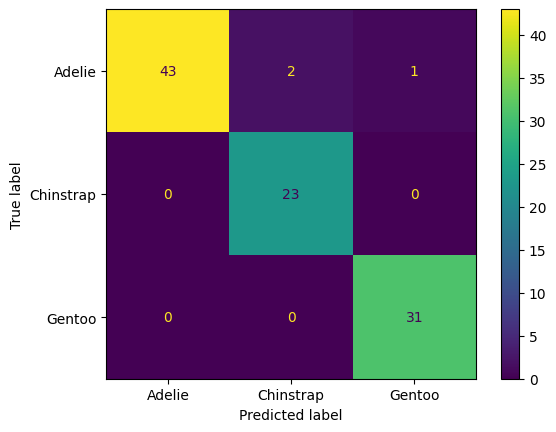

In [47]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

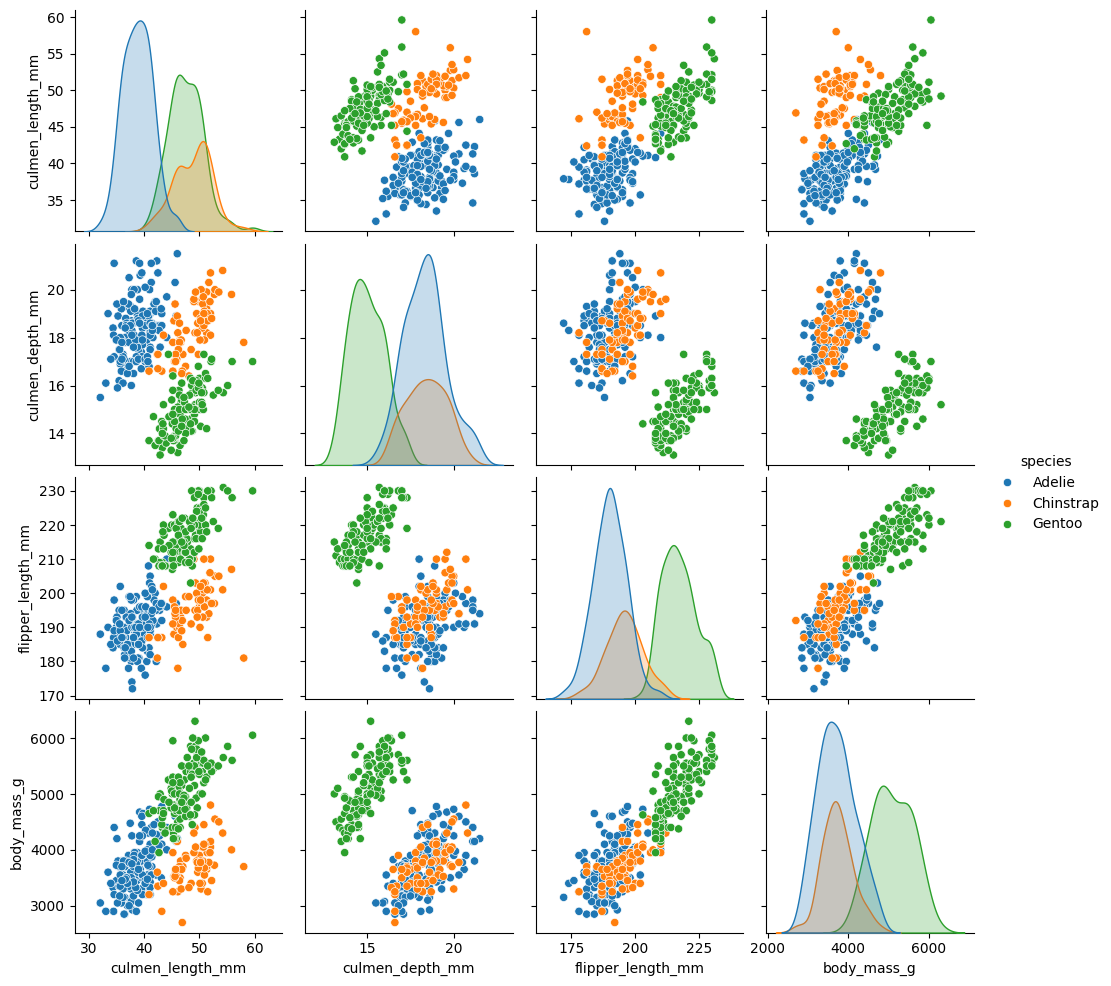

In [48]:
sns.pairplot(data=df, hue="species")

In [49]:
print(classification_report(y_test, pengu_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.93      0.97        46
   Chinstrap       0.92      1.00      0.96        23
      Gentoo       0.97      1.00      0.98        31

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



In [ ]:
model.feature_importances_
# Özellik Önemlilik derecesi

array([0.36723462, 0.00210629, 0.5622097 , 0.        , 0.06844939,
       0.        , 0.        ])

In [51]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Özellik Katsayıları"])

,Özellik Katsayıları
culmen_length_mm,0.367235
culmen_depth_mm,0.002106
flipper_length_mm,0.562210
body_mass_g,0.000000
island_Dream,0.068449
island_Torgersen,0.000000
sex_MALE,0.000000


#### **Karar Verme Apacı Nedir?**

In [53]:
from sklearn.tree import plot_tree

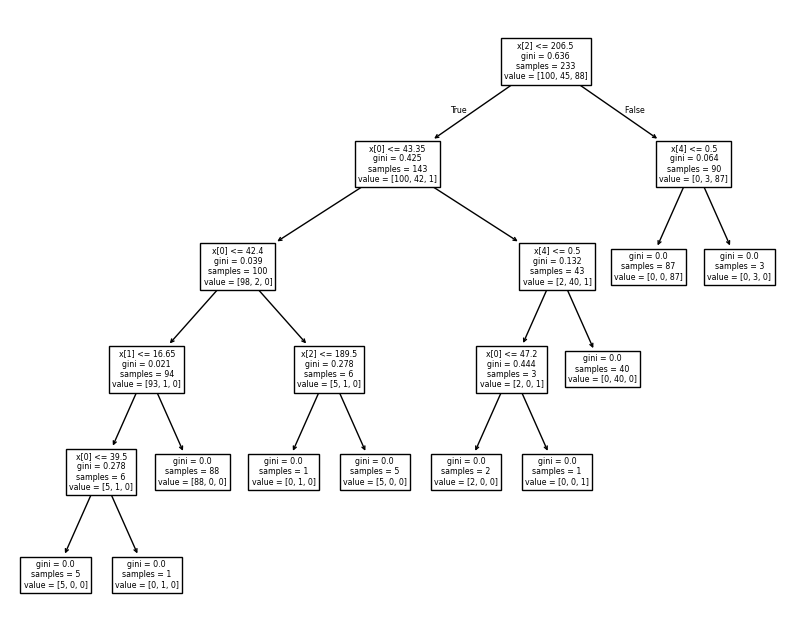

In [55]:
plt.figure(figsize=(10,8))
plot_tree(model);

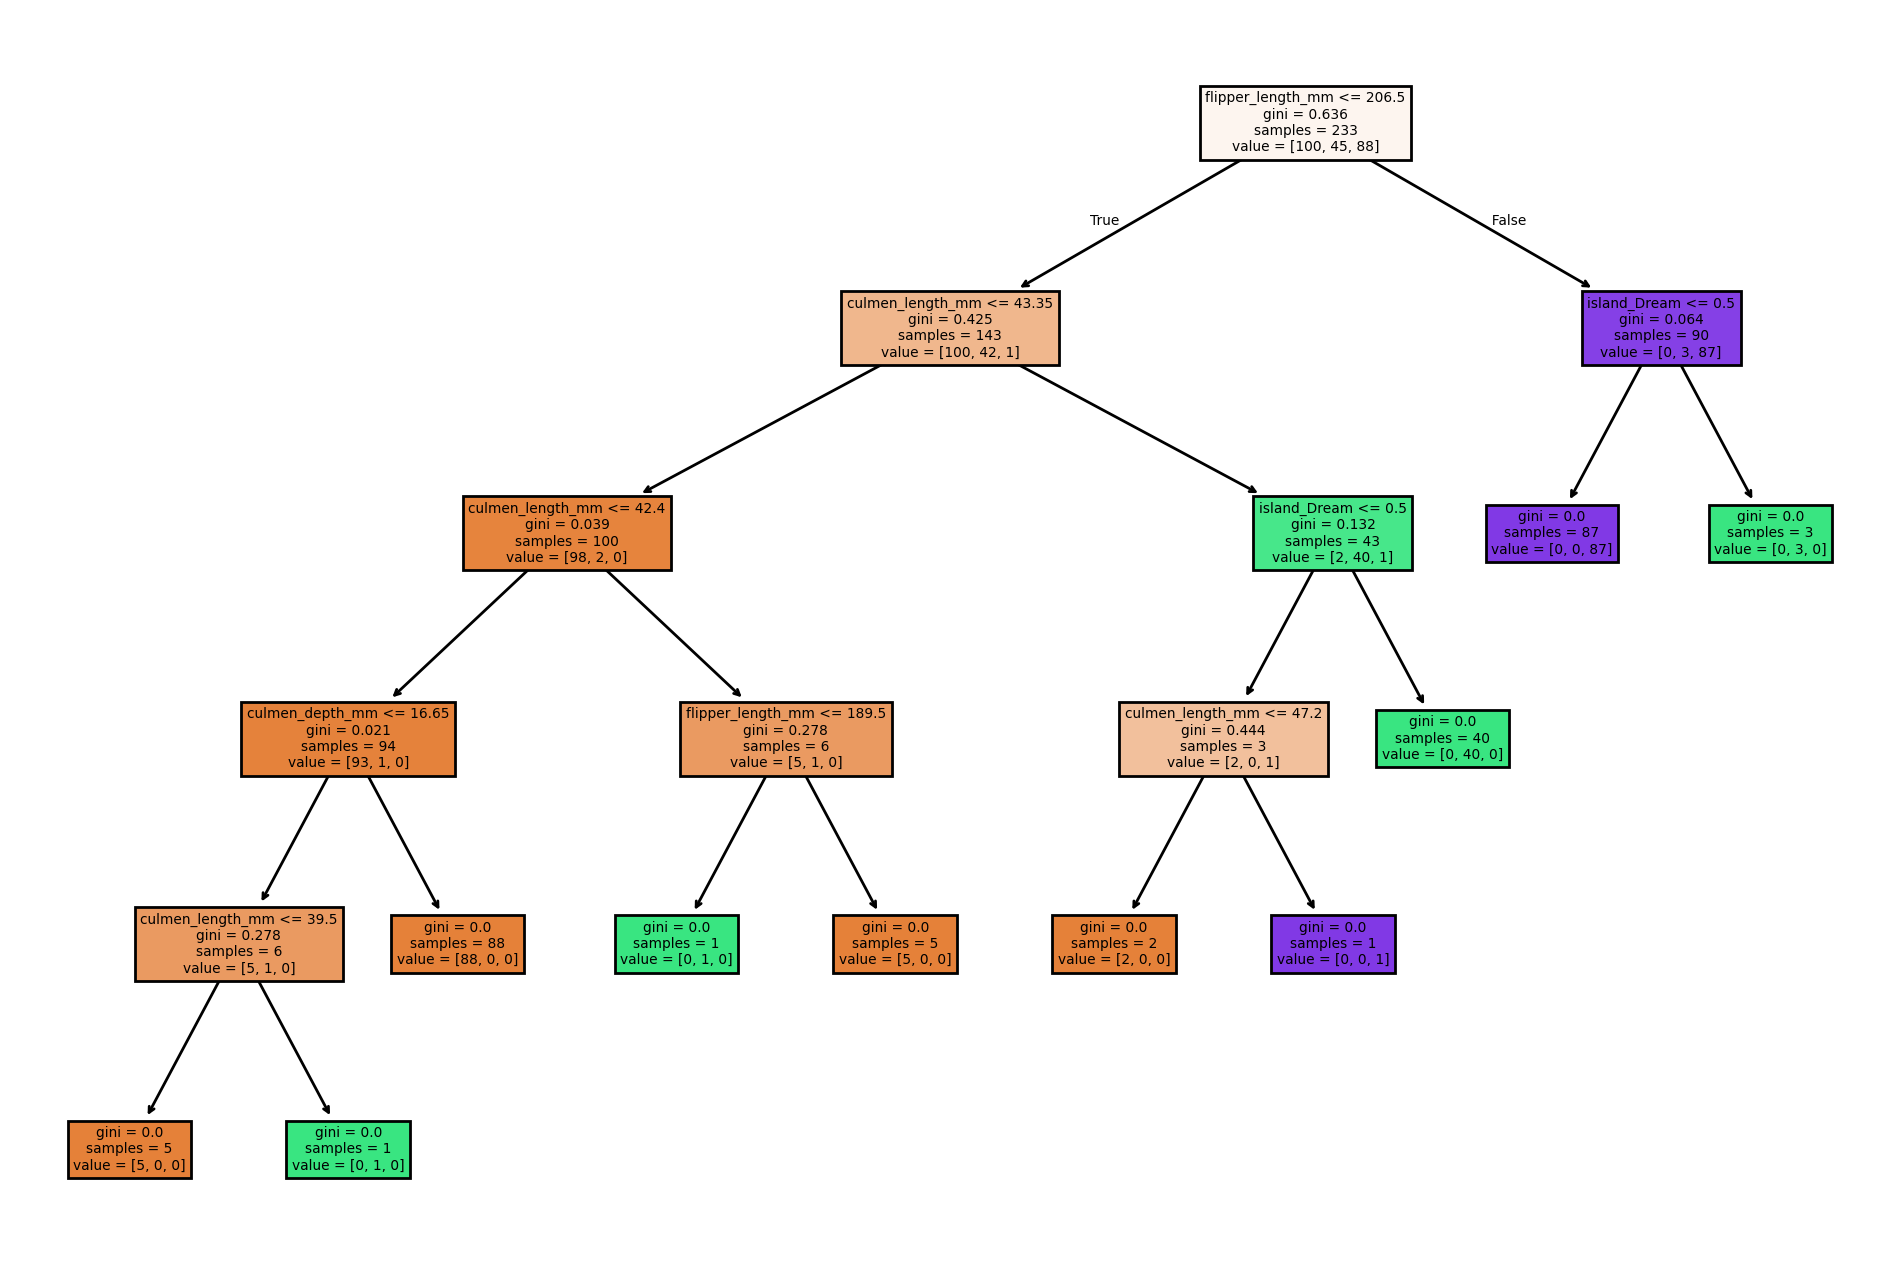

In [58]:
plt.figure(figsize=(12,8), dpi=200)
plot_tree(model, filled= True, feature_names=X.columns);

In [ ]:
def model_sonuc(model):
    pengu_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    print(classification_report(pengu_pred, y_test), "\n")
    plt.figure(figsize=(12,8),dpi=200)
    plot_tree(model, filled= True, feature_names=X.columns);


##### **Az Agac**

In [64]:
# Max_depth gideceği max adım sayısı biz 2 olarak belirledik burada
az_agac = DecisionTreeClassifier(max_depth=2)
az_agac.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.91      0.93      0.92        45
   Chinstrap       0.87      0.87      0.87        23
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.93       100
   macro avg       0.93      0.92      0.93       100
weighted avg       0.93      0.93      0.93       100
 



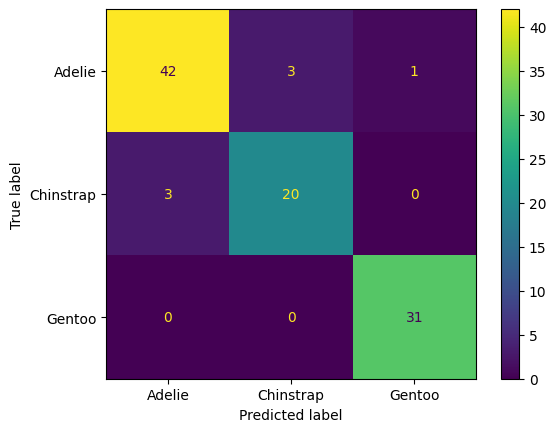

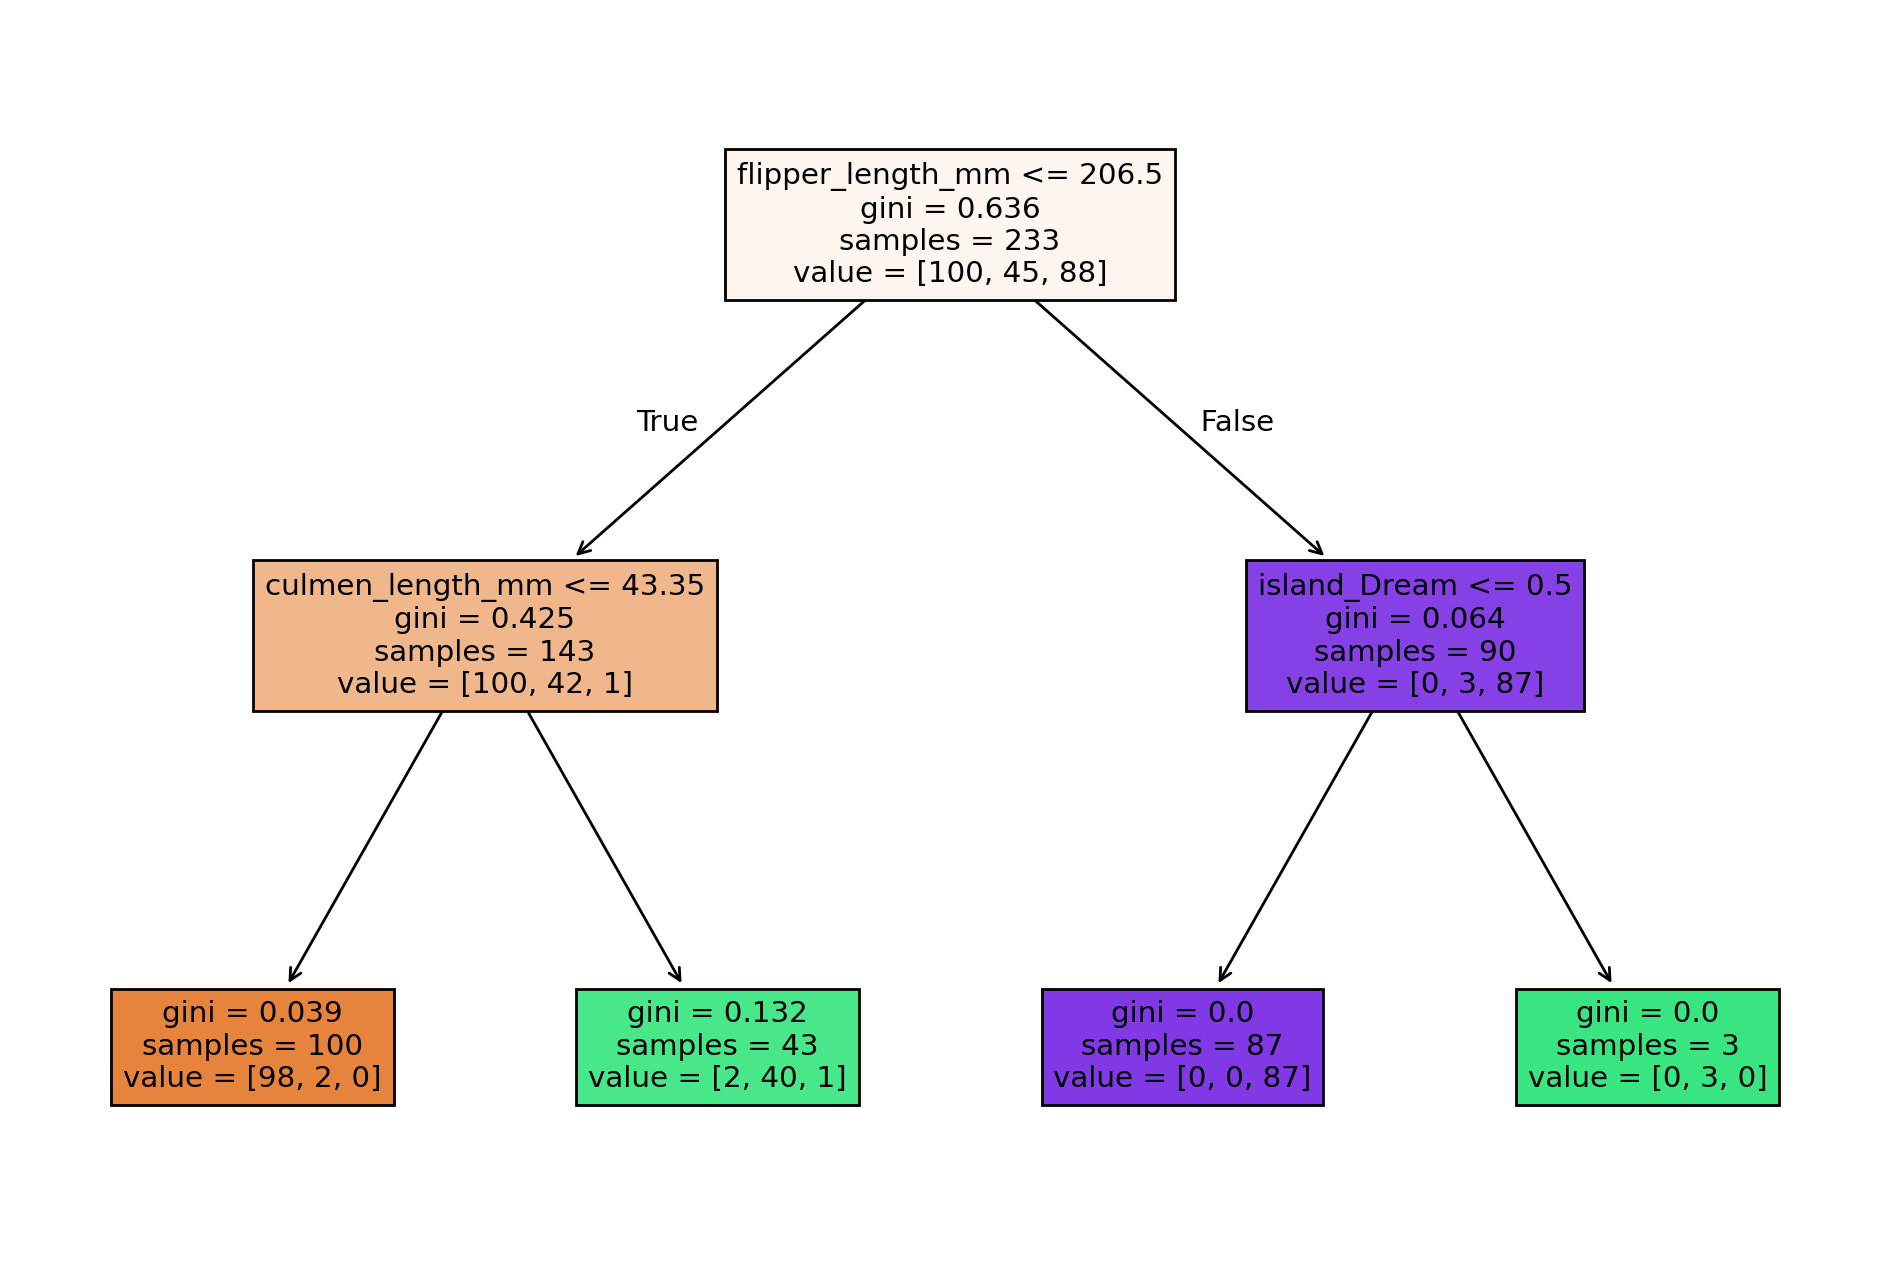

In [65]:
model_sonuc(az_agac)
# Burada yaptığımız yukarıda İsteğimize göre oluşturduğumuz agac modelimizi yazdığımız fonksinyonun içine vererek o fonksiyonu çalıştırdığımızda fonkisyonun içine yazdığımız şeylerle verdiğimiz fonksiyonla alakalı yapılmasını istediğimiz işlemlerin yapılmasını sağlamak

##### **Az Yaprak**

              precision    recall  f1-score   support

      Adelie       0.93      0.93      0.93        46
   Chinstrap       0.87      0.91      0.89        22
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100
 



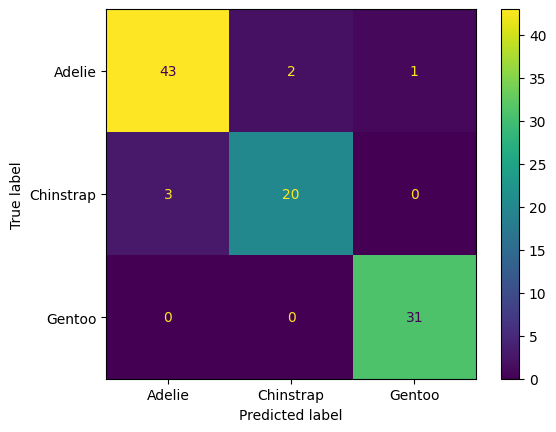

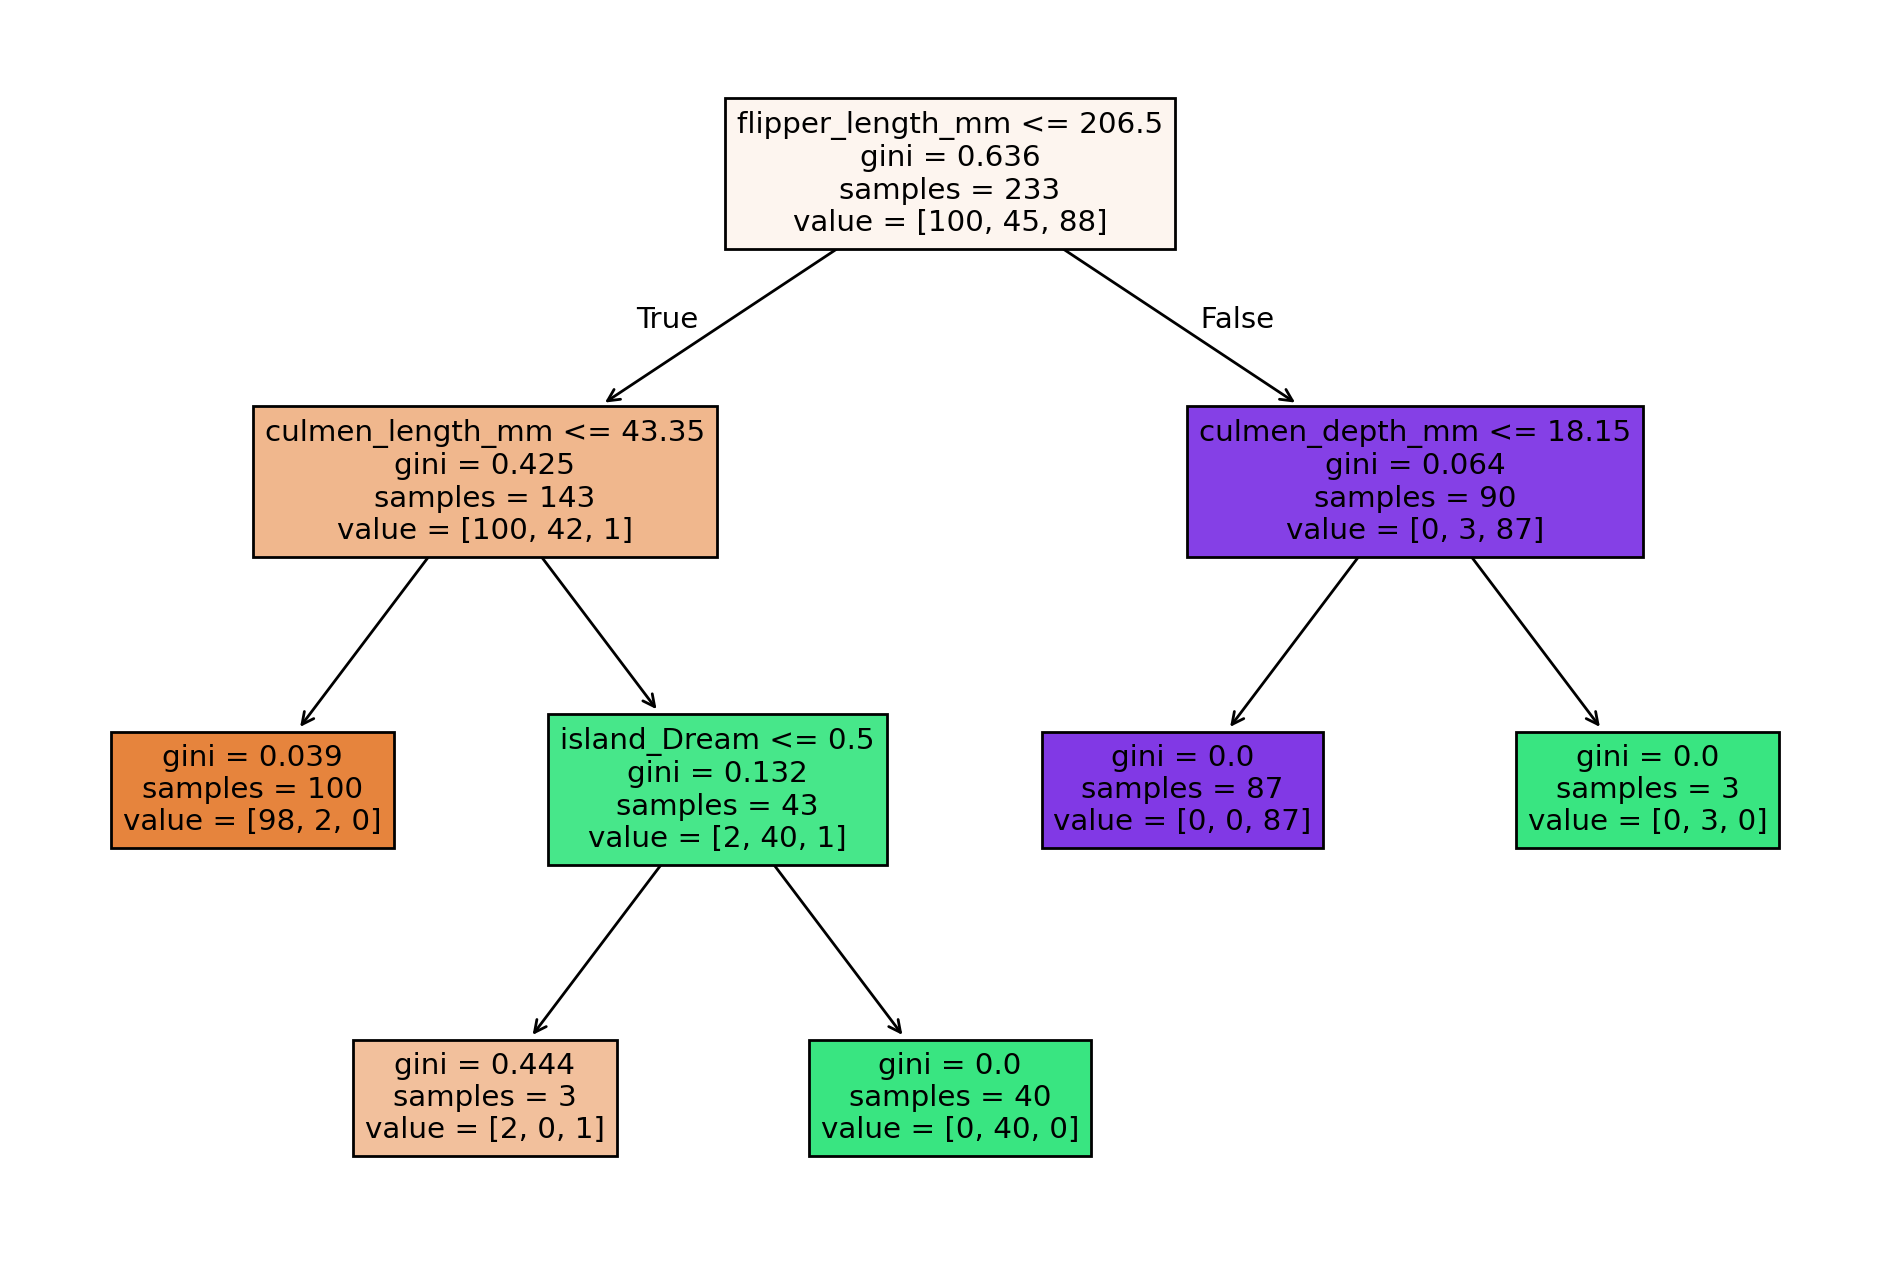

In [66]:
az_yaprak = DecisionTreeClassifier(max_leaf_nodes=5)
az_yaprak.fit(X_train, y_train)

model_sonuc(az_yaprak)

#### **Optimizasyon**

In [67]:
entropi = DecisionTreeClassifier(criterion="entropy")
# criterion içindeki diğer fonkisyonlara bak

entropi.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.97        43
   Chinstrap       1.00      0.92      0.96        25
      Gentoo       1.00      0.97      0.98        32

    accuracy                           0.97       100
   macro avg       0.98      0.96      0.97       100
weighted avg       0.97      0.97      0.97       100
 



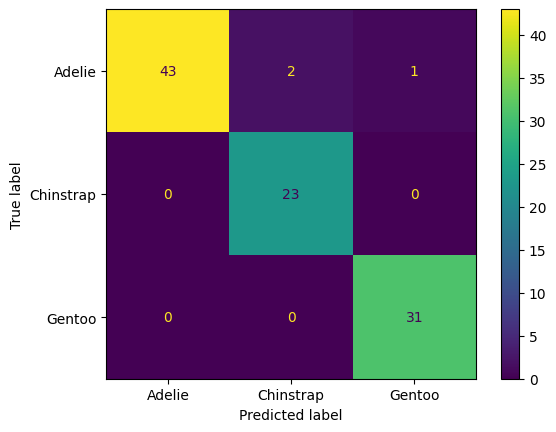

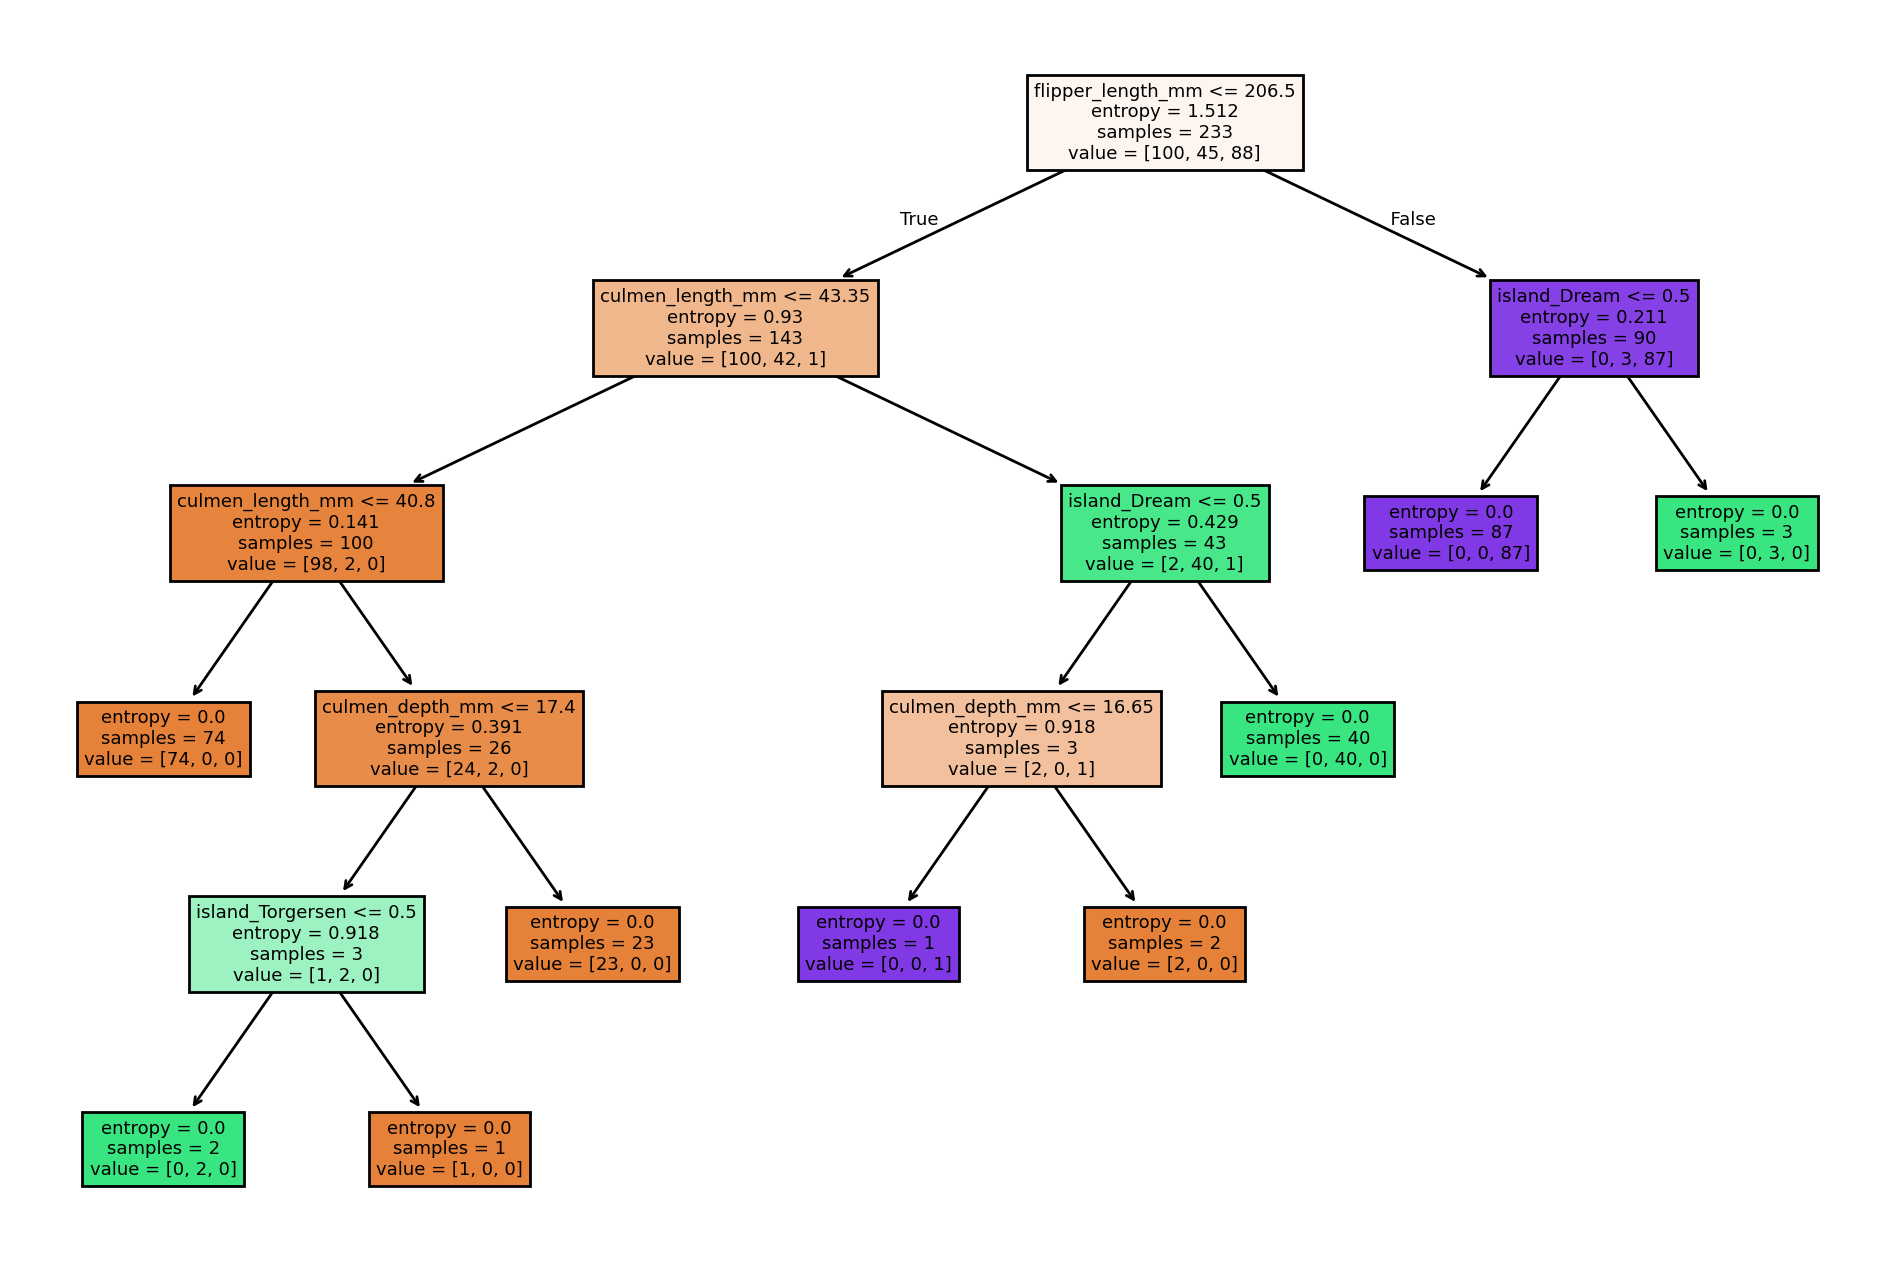

In [68]:
model_sonuc(entropi)